**Classification** is a problem of predicting whether something is one thing or another(there can be multiple things as well)

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change the directory to your desired location
import os
os.chdir('/content/drive/MyDrive/Pytorch ')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ls

'1. Intro to PyTorch Tensors'/  '3. Neural Network Classification'/   models/     __pycache__/
'2. PyTorch Workflow'/           helper_functions.py                  Projects/


##1. Make classification data and get it ready

In [3]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [6]:
# Make DataFrame of circle data

import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


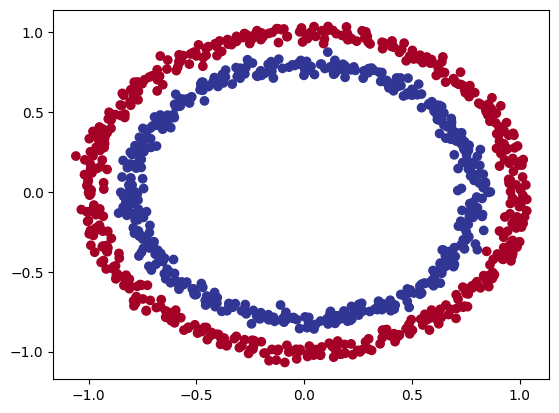

In [7]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y= X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

### 1.1 Check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Value for one sample of X: {X_sample} and the same for y: {y_sample}")

print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Value for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train-test splits

In [10]:
import torch
torch.__version__

'2.5.1+cu121'

In [11]:
# Turn data into tensors
print(type(X)) # this shows the X is numpy array.

# Turn numpy to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

print(X[:5],y[:5])

<class 'numpy.ndarray'>
tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]]) tensor([1., 1., 1., 1., 0.])


In [12]:
# Split data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [13]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [14]:
# SHapes of x & y
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [15]:
X_train[:]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [16]:
X_test.reshape(-1,1)[:5]

tensor([[-0.3752],
        [ 0.6827],
        [ 0.0154],
        [ 0.9600],
        [-0.7028]])

In [17]:
X_test[:5]

tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438]])

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator(GPU) if there is one
2. Construct a model(by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create training and test loop

In [18]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup deivce agnostic code, let's create a model that:
1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create two `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiates the model and sends it to the target 'device`

In [19]:
from sklearn import datasets
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create two nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features= 5) # takes in 2 features and upscales into 5 features (5 neurons)
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes into 5 features from previous layer and outputs a single feature (same shape as y)

  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x-> layer_1 -> layer_2 -> output
# 4. Instantiate an instance of our mode class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6350, -0.3673],
                      [ 0.4284,  0.1589],
                      [-0.3995, -0.2898],
                      [ 0.1882,  0.4178],
                      [-0.2112, -0.4874]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.2013,  0.6893, -0.0231,  0.4518,  0.6437], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.2809,  0.4129,  0.0784, -0.1430,  0.4305]], device='cuda:0')),
             ('layer_2.bias', tensor([0.3504], device='cuda:0'))])

In [21]:
# Let's replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3473, -0.6839],
                      [ 0.4374,  0.1432],
                      [ 0.6816,  0.5733],
                      [ 0.4674, -0.6489],
                      [-0.4651, -0.4482]], device='cuda:0')),
             ('0.bias',
              tensor([-0.2966,  0.5355, -0.3948, -0.6565,  0.2248], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.1375, -0.2662,  0.1631, -0.2562, -0.2489]], device='cuda:0')),
             ('1.bias', tensor([0.2419], device='cuda:0'))])

In [23]:
# Reshape X_test if necessary (if it's a 1D tensor)
if len(X_test.shape) == 1:
    X_test = X_test.reshape(-1, )  # Convert to (batch_size, 2)


# Make predictions with the model
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.2910],
        [ 0.3351],
        [ 0.0711],
        [ 0.3538],
        [-0.0944],
        [-0.0662],
        [ 0.1892],
        [ 0.0947],
        [ 0.0784],
        [ 0.3363]], device='cuda:0')

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer
**Which loss function to use?** This is problem specific

For example, if you're working on a **regression problem**, you might want **MAE or MSE**(mean absolute error or mean squared error).

For **classification** you might want **binary cross entropy or categorical cross entropy(cross entropy)**.

For **Optimizers**, two of the most common and useful are **SGD and Adam**, however PyTorch has many built-in options.

For the loss function we're going to use `torch.nn.BCEWithLogitsLoss()`, for more details: https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html

**What are logits in deep learning?** *Logits* are the outputs of a neural network before the activation function is applied. They are the unnormalized probabilities of the item belonging to a certain class. Logits are often used in classification tasks, where the goal is to predict the class label of an input.

In [24]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() #BCELoss = requires input to have gone through the sigmoid activation built it

# Setup the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [25]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

## 3. Train the model

To train our model, we're going to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropogation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function(e.g sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities into **prediction labels** by either rounding them or taking the `argmax()`

In [26]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.2910],
        [ 0.3351],
        [ 0.0711],
        [ 0.3538],
        [-0.0944]], device='cuda:0')

In [27]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [28]:
# User the sigmoid activation function on our model logits to turn them into prediction probabilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5723],
        [0.5830],
        [0.5178],
        [0.5875],
        [0.4764]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [29]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of the dimension
y_preds.squeeze()


tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 0.], device='cuda:0')

### 3.2 Building train and test loops

In [30]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

X_train shape: torch.Size([800, 2]), y_train shape: torch.Size([800])
X_test shape: torch.Size([200, 2]), y_test shape: torch.Size([200])
Epoch: 0 | Loss: 0.69642, Accuracy: 52.50% | Test loss: 0.70204, Test acc: 49.50%
Epoch: 10 | Loss: 0.69482, Accuracy: 51.62% | Test loss: 0.69966, Test acc: 50.00%
Epoch: 20 | Loss: 0.69418, Accuracy: 51.12% | Test loss: 0.69842, Test acc: 47.50%
Epoch: 30 | Loss: 0.69387, Accuracy: 50.62% | Test loss: 0.69766, Test acc: 47.50%
Epoch: 40 | Loss: 0.69368, Accuracy: 50.62% | Test loss: 0.69713, Test acc: 48.50%
Epoch: 50 | Loss: 0.69355, Accuracy: 50.38% | Test loss: 0.69672, Test acc: 49.00%
Epoch: 60 | Loss: 0.69345, Accuracy: 50.25% | Test loss: 0.69641, Test acc: 48.50%
Epoch: 70 | Loss: 0.69338, Accuracy: 50.25% | Test loss: 0.69615, Test acc: 48.00%
Epoch: 80 | Loss: 0.69331, Accuracy: 50.12% | Test loss: 0.69595, Test acc: 47.50%
Epoch: 90 | Loss: 0.69326, Accuracy: 50.38% | Test loss: 0.69577, Test acc: 47.00%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

So it inspect it, let's make predictions and make them visual!

To do so, we're going to import a function called `plot_decision_boundary()` from Daniel bourke's github: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py



In [31]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


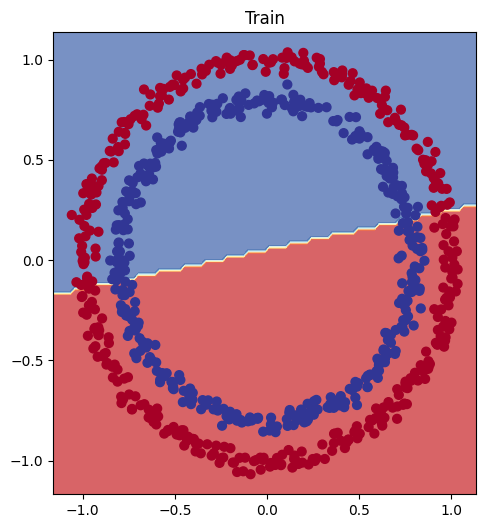

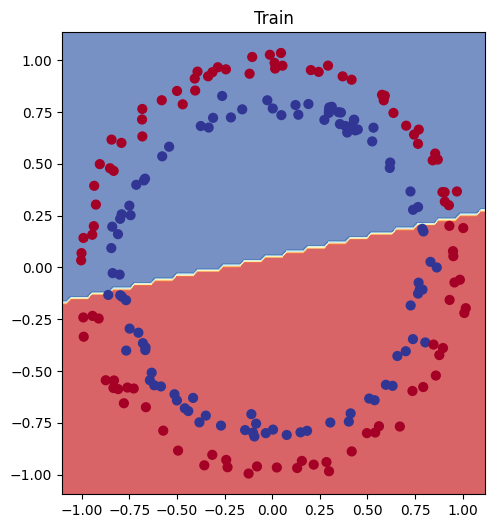

In [32]:
# Plot decision boundary of the model
## For Training data ##
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

## For Testing Data ##
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.title("Train")
plot_decision_boundary(model_0, X_test, y_test)


## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chance to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Change the Learning rate
* Try different activation functions
* Try different loss functions
* Try different optimizers


These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as Machine Learning Engineers and Data Scientists) can changem they are referred as **hyperparameters**.

In [33]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features = 10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(x)
    # z = self.layer_3(x)
    return self.layer_3(self.layer_2(self.layer_1(x))) # we can write both the ways


# Create Model_1 instance
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [35]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the epochs
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building training and testing loop
for epoch in range(epochs):
  ### Training###
  model_1.train()

  # 1. forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss Backwards
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  ### Testing ###

  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss/accuracy
    test_loss = loss_fn(test_logits, y_test
                        )

    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  # Print out what's happening every 10 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


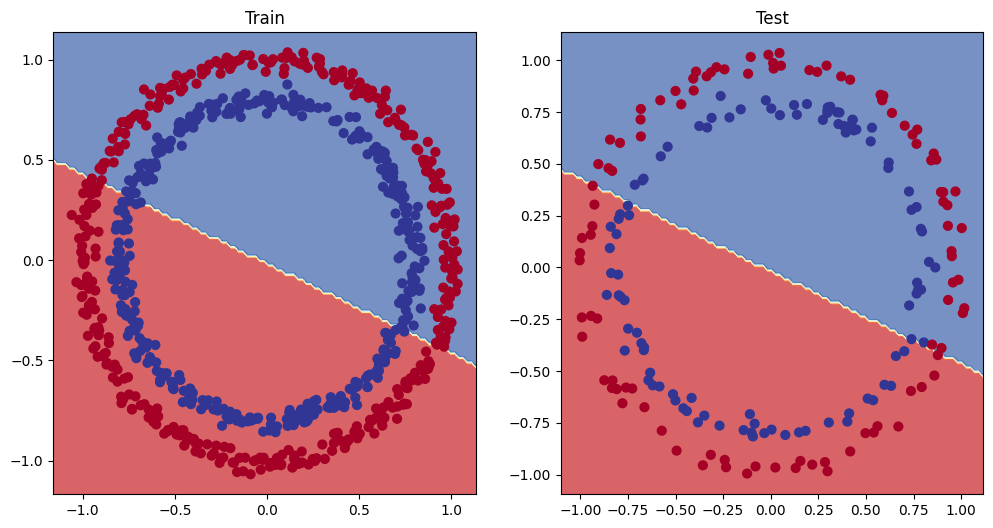

In [36]:
# Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [37]:
# Create some data(same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
print(X_regression[:5], y_regression[:5])



100
tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400]]) tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280]])


In [38]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


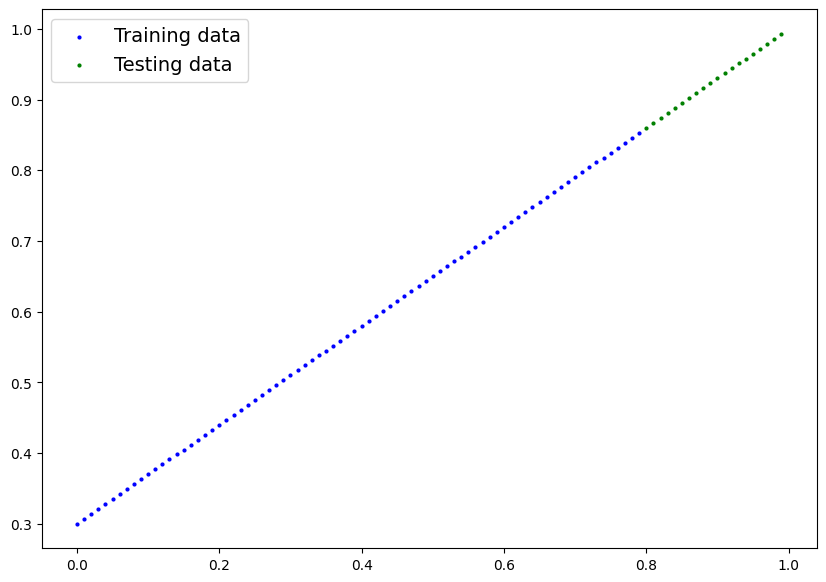

In [39]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

### 5.1 Adjusting `model_1` to fit a straight line

In [40]:
# Same architecture as model_1 (but using nn.Sequential())

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
model_2.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.7645],
                      [ 0.8300],
                      [-0.2343],
                      [ 0.9186],
                      [-0.2191],
                      [ 0.2018],
                      [-0.4869],
                      [ 0.5873],
                      [ 0.8815],
                      [-0.7336]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,  0.7709,  0.1478,
                      -0.4668,  0.2549], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
                        0.0298, -0.3123],
                      [ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
         

In [42]:
# Loss and optimizer
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)



In [43]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.91103
Epoch: 100 | Train loss: 0.02858, Test loss: 0.00081
Epoch: 200 | Train loss: 0.02533, Test loss: 0.00209
Epoch: 300 | Train loss: 0.02137, Test loss: 0.00305
Epoch: 400 | Train loss: 0.01964, Test loss: 0.00341
Epoch: 500 | Train loss: 0.01940, Test loss: 0.00387
Epoch: 600 | Train loss: 0.01903, Test loss: 0.00379
Epoch: 700 | Train loss: 0.01878, Test loss: 0.00381
Epoch: 800 | Train loss: 0.01840, Test loss: 0.00329
Epoch: 900 | Train loss: 0.01798, Test loss: 0.00360


Okay, unlike model_1 on the classification data, it looks like model_2's loss is actually going down.

Let's plot its predictions to see if that's so.

And remember, since our model and data are using the target device, and this device may be a GPU, however, our plotting function uses matplotlib and matplotlib can't handle data on the GPU.

To handle that, we'll send all of our data to the CPU using .cpu() when we pass it to plot_predictions().

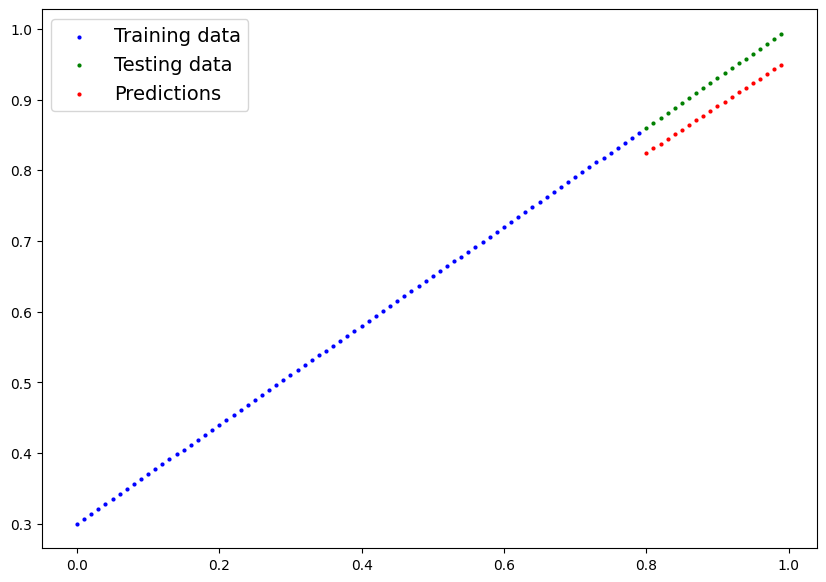

In [44]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

## 6. The missing piece: **Non - Linearity**

Non-linearity in machine learning refers to the property of a model or system where the output is not directly proportional to the input. This means that small changes in the input can lead to disproportionate changes in the output, allowing for more complex relationships between variables to be captured56. In neural networks, non-linearity is crucial because it enables the network to learn and model complex patterns by introducing activation functions that create boundaries between layers, preventing them from being simplified into a single linear function2. Non-linear models are often used when the relationship between dependent and independent variables is complex and cannot be adequately represented by a linear model.

### 6.2 Recreating non-linear data(red and blue circles)

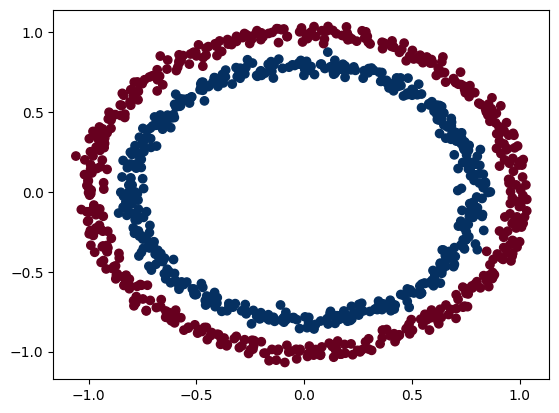

In [45]:
# Make and plot data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdBu);

In [46]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


### 6.2 Building a model with non-linearity

* Linear = straight

* Non-Linear = non-straight

Artificial Neural Networks(ANN) are a large combination of linear(straight) and non-straight (non-linear) functions which are potential;y able to find patterns in data.


In [47]:
# Build a modle with non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() #relu is a non-linear activation function

  def forward(self, x):
    # Question: Where should we put our non-linear activation funcitons?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [48]:
### Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),lr=0.1)


### 6.3 Training a model with non-linearity


In [49]:
# Fit the model
torch.manual_seed(42)
epochs = 1500

# Put all the data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ## Training##

  # 1. Do forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probs -> prediction values/labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing ##
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss and accuracy
    test_loss - loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.03951, Test acc: 50.00%
Epoch: 10 | Loss: 0.69248, Accuracy: 50.50% | Test loss: 0.03951, Test acc: 50.00%
Epoch: 20 | Loss: 0.69225, Accuracy: 59.13% | Test loss: 0.03951, Test acc: 56.50%
Epoch: 30 | Loss: 0.69209, Accuracy: 70.25% | Test loss: 0.03951, Test acc: 68.00%
Epoch: 40 | Loss: 0.69195, Accuracy: 68.38% | Test loss: 0.03951, Test acc: 71.00%
Epoch: 50 | Loss: 0.69181, Accuracy: 58.25% | Test loss: 0.03951, Test acc: 58.00%
Epoch: 60 | Loss: 0.69168, Accuracy: 54.00% | Test loss: 0.03951, Test acc: 54.50%
Epoch: 70 | Loss: 0.69155, Accuracy: 53.12% | Test loss: 0.03951, Test acc: 53.00%
Epoch: 80 | Loss: 0.69141, Accuracy: 52.62% | Test loss: 0.03951, Test acc: 53.00%
Epoch: 90 | Loss: 0.69128, Accuracy: 52.75% | Test loss: 0.03951, Test acc: 53.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test loss: 0.03951, Test acc: 52.50%
Epoch: 110 | Loss: 0.69103, Accuracy: 52.88% | Test loss: 0.03951, Test acc: 53.50%
Epo

### 6.4 Evaluating a model trained with non-linear activation funcitons

In [50]:
# Make predictions
# Move model_3 to the same device as X_test if it's not already there
model_3.to(X_test.device) # Add this line to ensure model_3 is on the same device as X_test
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

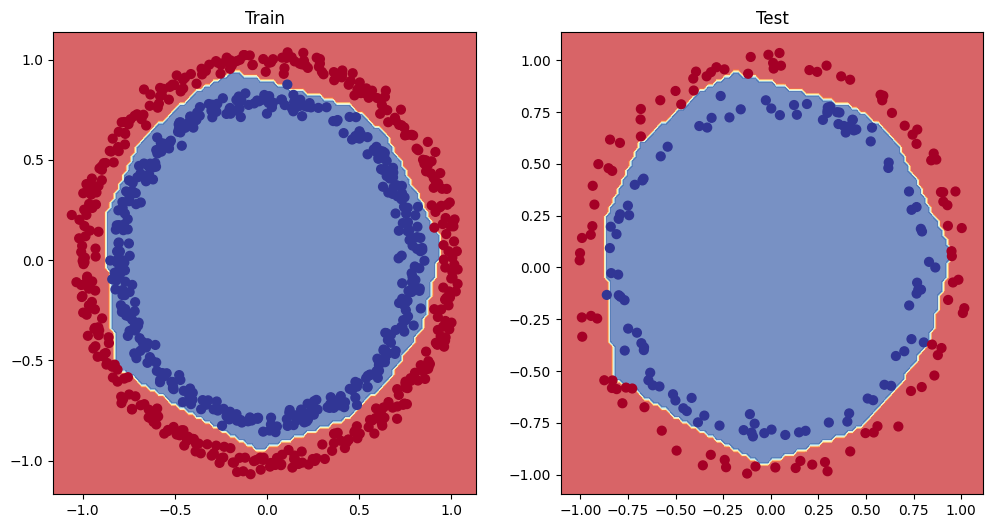

In [51]:
# Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 8. Putting it all together with a multi-class classification problem

* Binary classification - one thing or another (cat vs dog, spam vs not spam, fraud or not fraud)
* Multi-class classification - more than one thing or another (dog vs cat vs chicken)


### 8.1 Creating a toy multi-class dataset

tensor([[ 3.1612,  1.5469],
        [-8.7430, -8.5685],
        [ 3.3684,  0.9950],
        [-8.5344, -5.6493],
        [-9.5321,  7.9050]]) tensor([1, 2, 1, 2, 3])


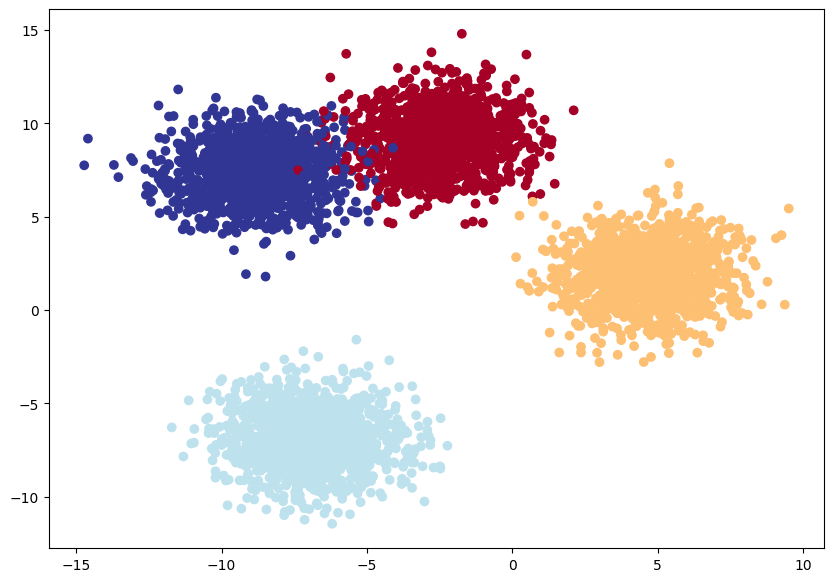

In [71]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=5000,
                            n_features = NUM_FEATURES,
                            centers= NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up (try chaning this to 1.0, the default)
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state = RANDOM_SEED
                                                                        )


# 4. Plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu);



### 8.2 Building a multi-class classification model in PyTorch

In [72]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [94]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):

    """
    Initializes multi-class classification model

    Args:
    input_features(int): Number of input features to the model
    output_features(int): Number of output features (number of output classes)
    hidden_units (int): Number of hidden units between layers, default 8
    """

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features=hidden_units),
        #nn.ReLU(), not necessary for this model because our data is `linearly seperable`
        nn.Linear(in_features= hidden_units, out_features = hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [95]:
### 8.3 Create a loss function and an optimizer for a multi-class classification model - loss function measures how wrong our model's predictions are

loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model's parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities)




In [96]:
# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[ 2.6446,  0.7065,  3.0386,  1.3806],
        [-0.2259, -1.7759, -0.4843,  0.9733],
        [-0.9871, -0.3682, -1.1204, -0.6909],
        [ 2.4781,  0.6081,  2.8408,  1.3226],
        [-1.3488, -0.7622, -1.5760, -0.6811],
        [ 0.1968, -1.5710,  0.0113,  1.1543],
        [-0.8046, -0.4158, -0.9260, -0.5103],
        [ 1.5960, -1.7763,  1.5243,  2.4190],
        [-1.7627, -0.6824, -2.0208, -1.0695],
        [ 1.6713, -1.2150,  1.6884,  2.0559]], device='cuda:0')

In [97]:
y_blob_test[:10]

tensor([2, 0, 1, 2, 1, 0, 1, 3, 1, 3], device='cuda:0')

In [98]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
y_pred_probs[:5]

tensor([[ 2.6446,  0.7065,  3.0386,  1.3806],
        [-0.2259, -1.7759, -0.4843,  0.9733],
        [-0.9871, -0.3682, -1.1204, -0.6909],
        [ 2.4781,  0.6081,  2.8408,  1.3226],
        [-1.3488, -0.7622, -1.5760, -0.6811]], device='cuda:0')


tensor([[0.3437, 0.0495, 0.5097, 0.0971],
        [0.1886, 0.0400, 0.1457, 0.6257],
        [0.1970, 0.3658, 0.1724, 0.2649],
        [0.3441, 0.0530, 0.4945, 0.1084],
        [0.1804, 0.3243, 0.1437, 0.3517]], device='cuda:0')

In [99]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [100]:
# Print the maximum probabilty in a row
torch.argmax(y_pred_probs[0])

tensor(2, device='cuda:0')

In [101]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([2, 3, 1, 2, 3, 3, 1, 3, 1, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 2, 3, 3, 3, 3,
        2, 1, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 1, 3, 2, 2,
        2, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 2, 1, 3, 3, 3, 3,
        3, 1, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 1, 3, 2, 2, 1, 3, 2, 3, 3, 2,
        3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 2, 3, 1, 3, 3, 3, 1, 2,
        2, 2, 2, 3, 2, 3, 2, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 2, 1,
        2, 2, 2, 3, 2, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3,
        2, 1, 1, 1, 3, 3, 2, 3, 2, 1, 3, 1, 3, 3, 1, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 3, 3, 3, 2, 3, 3, 2, 1, 1, 3, 2, 1, 1, 1, 1, 3, 3, 2, 1, 3, 3, 2, 2,
        3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3,
        3, 2, 3, 1, 3, 3, 3, 2, 2, 1, 3, 1, 3, 2, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3,
        3, 2, 1, 3, 2, 3, 2, 3, 1, 2, 2, 2, 1, 2, 3, 3, 3, 3, 1, 3, 2, 1, 2, 2,
        3, 1, 3, 1, 3, 3, 2, 3, 3, 2, 2,

In [102]:
y_blob_test

tensor([2, 0, 1, 2, 1, 0, 1, 3, 1, 3, 0, 2, 0, 3, 2, 3, 0, 1, 3, 2, 3, 3, 1, 3,
        2, 1, 3, 0, 1, 0, 3, 0, 3, 0, 1, 3, 3, 1, 0, 2, 2, 3, 2, 2, 1, 3, 2, 2,
        2, 0, 1, 0, 1, 1, 1, 3, 0, 0, 0, 2, 1, 3, 3, 1, 0, 1, 2, 1, 1, 0, 0, 3,
        3, 1, 2, 3, 0, 3, 3, 1, 0, 2, 1, 2, 3, 0, 1, 1, 2, 2, 1, 3, 2, 3, 0, 2,
        0, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 1, 0, 1, 2, 2, 0, 1, 3, 0, 3, 1, 2,
        2, 2, 2, 0, 2, 3, 2, 0, 1, 1, 3, 3, 3, 1, 3, 0, 1, 1, 1, 0, 3, 1, 2, 1,
        2, 2, 2, 0, 2, 1, 3, 3, 1, 3, 1, 0, 1, 3, 3, 2, 0, 2, 2, 1, 3, 0, 3, 0,
        2, 1, 1, 1, 0, 3, 2, 1, 2, 1, 3, 1, 0, 3, 1, 3, 2, 3, 0, 2, 3, 3, 2, 0,
        2, 1, 3, 1, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 3, 0, 2, 1, 0, 1, 2, 2,
        3, 0, 2, 2, 2, 3, 3, 0, 3, 0, 2, 0, 0, 1, 3, 3, 1, 3, 1, 0, 3, 3, 2, 3,
        3, 2, 0, 1, 0, 0, 0, 2, 3, 1, 3, 1, 3, 2, 1, 1, 1, 0, 0, 3, 0, 3, 3, 3,
        0, 2, 1, 1, 2, 0, 2, 0, 1, 3, 2, 2, 1, 2, 3, 0, 3, 3, 1, 3, 3, 1, 2, 2,
        0, 1, 3, 1, 0, 1, 2, 3, 3, 2, 2,

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [103]:
# Fit the model
torch.manual_seed(42)
epochs=1000

# Put all data on target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  ## Training ##
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # this is because we need to get only the max prob in a row. That's why we use 'argmax(dim=1)` here

  # 2. Calculate the loss and accuracy
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                   y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing ##
  model_4.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # 2. Calculate test loss
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc}")

Epoch: 0 | Loss: 1.04274, Accuracy: 65.83% | Test loss: 0.58041, Test acc: 94.19999999999999
Epoch: 100 | Loss: 0.03029, Accuracy: 99.08% | Test loss: 0.03458, Test acc: 98.8
Epoch: 200 | Loss: 0.02584, Accuracy: 99.08% | Test loss: 0.03037, Test acc: 98.8
Epoch: 300 | Loss: 0.02454, Accuracy: 99.10% | Test loss: 0.02926, Test acc: 98.8
Epoch: 400 | Loss: 0.02390, Accuracy: 99.12% | Test loss: 0.02875, Test acc: 98.8
Epoch: 500 | Loss: 0.02349, Accuracy: 99.12% | Test loss: 0.02845, Test acc: 98.8
Epoch: 600 | Loss: 0.02319, Accuracy: 99.10% | Test loss: 0.02822, Test acc: 98.8
Epoch: 700 | Loss: 0.02294, Accuracy: 99.10% | Test loss: 0.02805, Test acc: 98.8
Epoch: 800 | Loss: 0.02273, Accuracy: 99.10% | Test loss: 0.02790, Test acc: 98.8
Epoch: 900 | Loss: 0.02254, Accuracy: 99.10% | Test loss: 0.02777, Test acc: 98.8


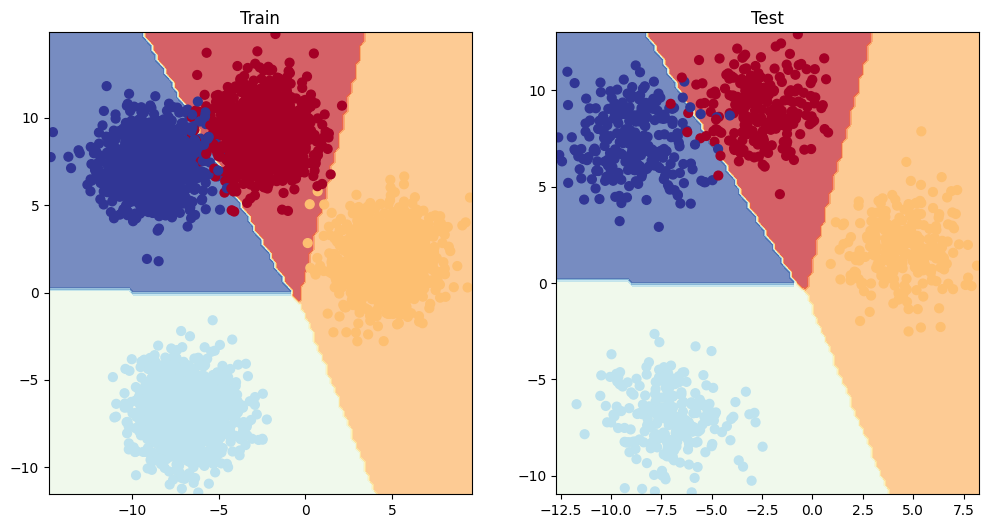

In [104]:
# Plot predictions
# Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### 8.6 Making and evaluating prediction with a PyTorch multi-class model

In [105]:
# MAke predictions
# Move model to the same device as the input tensor
model_4.to(X_blob_test.device)  # Add this line to move model_4 to the device of X_blob_test

model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ -7.7352, -26.7744,  33.5028,  21.1712],
        [ 13.7087,   1.3708, -20.4366,  -1.5603],
        [  2.2139,  16.4387, -15.3179, -12.8333],
        [ -6.8702, -24.9739,  30.8019,  19.7367],
        [  5.5914,  19.6863, -22.8781, -15.4915],
        [ 11.8874,  -3.3653, -14.0044,   2.1951],
        [  2.5588,  13.8933, -13.8196, -10.8666],
        [ 13.2050, -22.2947,  -1.0170,  16.8691],
        [  5.0435,  25.3555, -26.5408, -19.8802],
        [  8.5159, -21.2068,   5.0629,  16.2058]], device='cuda:0')

In [106]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.2319e-18, 6.6369e-27, 1.0000e+00, 4.4102e-06],
        [1.0000e+00, 4.3825e-06, 1.4821e-15, 2.3374e-07],
        [6.6409e-07, 1.0000e+00, 1.6154e-14, 1.9378e-13],
        [4.3572e-17, 5.9825e-25, 9.9998e-01, 1.5647e-05],
        [7.5618e-07, 1.0000e+00, 3.2697e-19, 5.2780e-16],
        [9.9994e-01, 2.3757e-07, 5.6928e-12, 6.1753e-05],
        [1.1953e-05, 9.9999e-01, 9.2142e-13, 1.7657e-11],
        [2.4985e-02, 9.5583e-18, 1.6641e-08, 9.7501e-01],
        [1.5087e-09, 1.0000e+00, 2.8954e-23, 2.2615e-20],
        [4.5719e-04, 5.6457e-17, 1.4471e-05, 9.9953e-01]], device='cuda:0')

In [107]:
y_blob_test[:10]

tensor([2, 0, 1, 2, 1, 0, 1, 3, 1, 3], device='cuda:0')

In [108]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([2, 0, 1, 2, 1, 0, 1, 3, 1, 3], device='cuda:0')

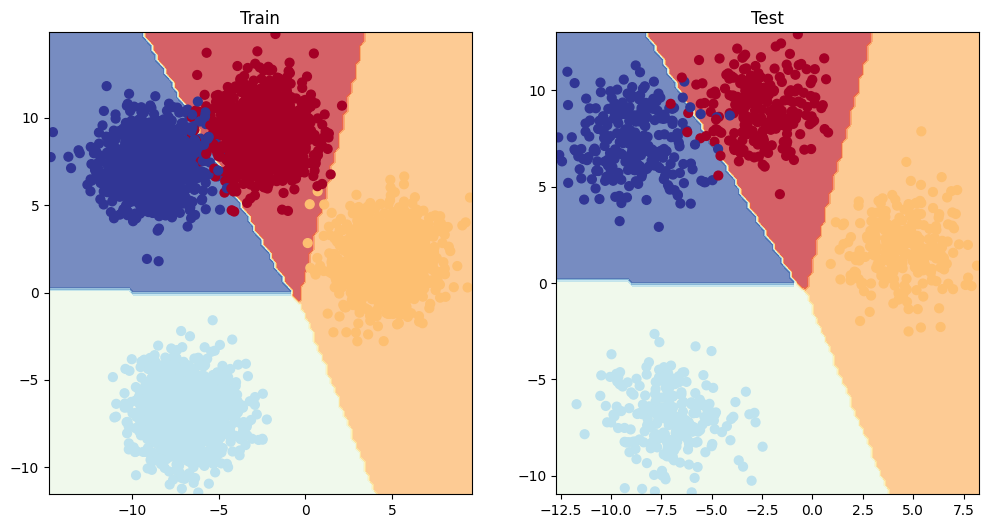

In [109]:
# Plot predictions again
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics...(to evaluate our classificaiton model) & when to use them..

* Accuracy - Default metric for classification problems. **Not** best for imbalanced datasets
* Precision - Higher precision leads to less false positives
* Recall - higher recall leads to less false negatives
`there is also a **precision-recall tradeoff**`
* F1-score - Combination of precision and recall, usually a good overall metric for a classification model
* Confusion matrix - When comparing predictions to truth labels to see where model gets confused. Can be hard to use with large numbers of classes.
* Classification report - this reports has all the details in them

See this article for when to use precision/recall - https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

